<a href="https://colab.research.google.com/github/IamMarcIvanov/DroughtStudiesProject/blob/master/prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet import Prophet

In [43]:
dataset = pd.read_csv('rain_Point_1.csv', index_col = 'TIME', parse_dates= True)

In [44]:
dataset['RAINFALL'].fillna(method='ffill', inplace= True)

In [46]:
dataset.drop(columns= ['LONGITUDE', 'LATITUDE'], inplace= True)

In [47]:
dataset.head()

,RAINFALL
TIME,
1951-01-01,0.0
1951-01-02,0.0
1951-01-03,0.0
1951-01-04,0.0
1951-01-05,0.0


In [48]:
from scipy.stats import boxcox

In [59]:
y_train = dataset[dataset.index < '2015-01-01']
y_test = dataset[dataset.index > '2015-01-01']

In [99]:
y_train = y_train.reset_index()
y_test = y_test.reset_index()

In [100]:
y_train.head()
y_train.rename(columns= {'TIME':'ds', 'RAINFALL':'y'}, inplace= True)
y_test.rename(columns= {'TIME':'ds', 'RAINFALL':'y'}, inplace= True)

In [66]:
model = Prophet()

In [101]:
y_test.head()

,ds,y
0,2015-01-02,0.0
1,2015-01-03,0.0
2,2015-01-04,0.0
3,2015-01-05,0.0
4,2015-01-06,0.0


In [67]:
model.fit(y_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [102]:
forecast = model.predict(y_test)

In [86]:
from sklearn.metrics import r2_score

In [91]:
forecast = forecast[forecast['ds'] > '2015-01-01']

In [94]:
r2_score(y_test['RAINFALL'].iloc[:-1], forecast['yhat'])

0.06516993313006514

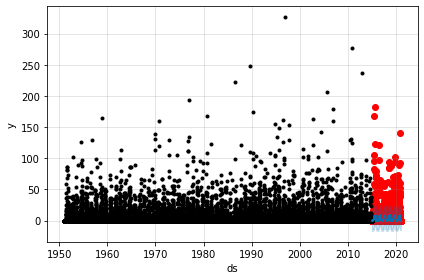

In [105]:
f, ax = plt.subplots(1)
ax.scatter(y_test['ds'], y_test['y'], color= 'r')
fig = model.plot(forecast, ax= ax)

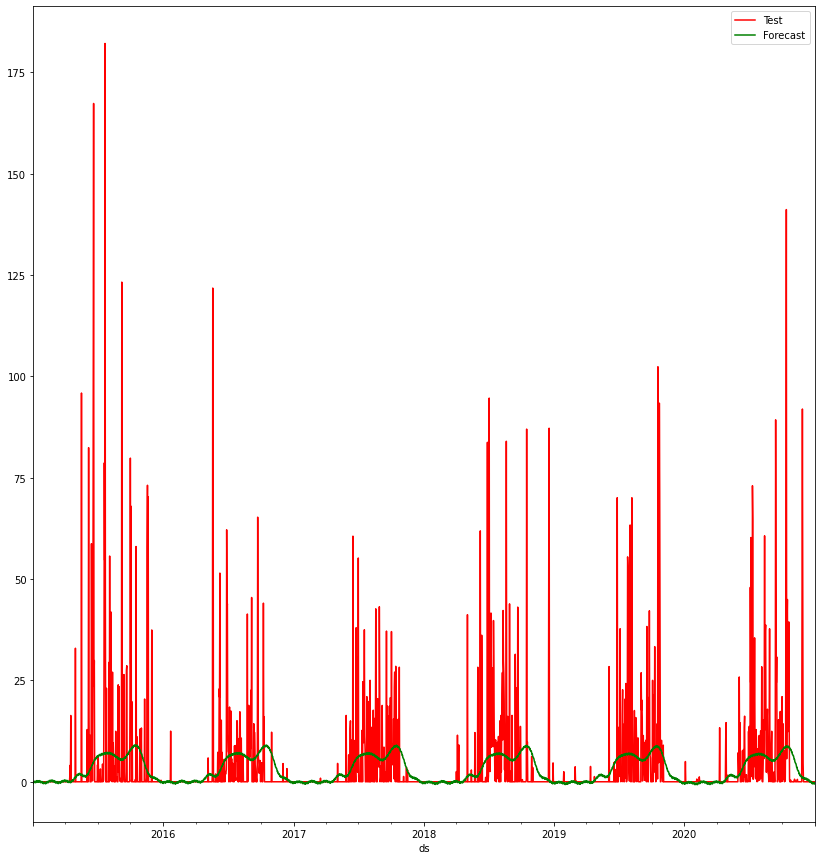

In [107]:
f, ax = plt.subplots(figsize = (14, 15))
y_test.plot(kind= 'line', x='ds', y= 'y', color= 'red', label='Test', ax=ax)
forecast.plot(kind='line', x='ds', y='yhat', color= 'green', label='Forecast', ax=ax)
